Htet Khant Linn

Feb 16, 2026

Week 3 - Stationary vs Non-Stationary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import data

mean_stat_data = pd.read_csv('data/mean_stationary_data.csv')
print(mean_stat_data.info())

<class 'pandas.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         365 non-null    str    
 1   customers    365 non-null    float64
 2   day_of_week  365 non-null    int64  
 3   is_weekend   365 non-null    bool   
dtypes: bool(1), float64(1), int64(1), str(1)
memory usage: 9.0 KB
None


In [3]:
mean_stat_data.date = pd.to_datetime(mean_stat_data.date)
print(mean_stat_data.info())

<class 'pandas.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         365 non-null    datetime64[us]
 1   customers    365 non-null    float64       
 2   day_of_week  365 non-null    int64         
 3   is_weekend   365 non-null    bool          
dtypes: bool(1), datetime64[us](1), float64(1), int64(1)
memory usage: 9.0 KB
None


In [ ]:
mean_customer = mean_stat_data.customers.mean()
# Calculating overall mean for axhline
print(mean_customer)

314.7814177328767


## Creating Mean Stationary Chart

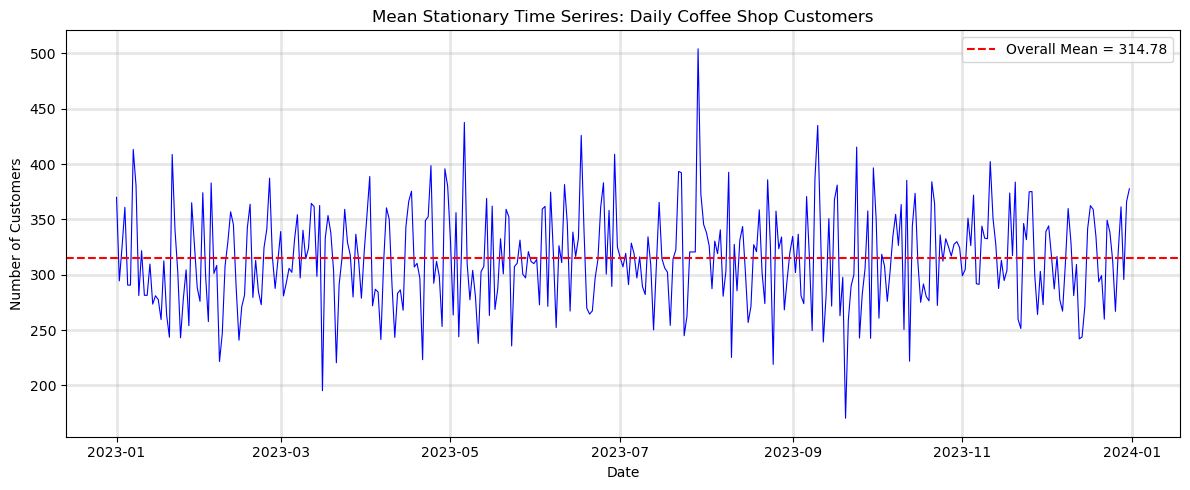

In [16]:
plt.figure(figsize=(12,5))
plt.plot(mean_stat_data.date, mean_stat_data.customers, color='blue', linewidth=0.8)
plt.axhline(mean_customer, color='red', linestyle='--', label=f'Overall Mean = {mean_customer:.2f}')
plt.title('Mean Stationary Time Serires: Daily Coffee Shop Customers')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(True, linewidth=2, alpha=0.3)
plt.tight_layout()
plt.savefig('output/Mean_Stationary_Time_Serires_Daily_Coffee_Shop_Customer.png')
plt.show()

## Creating Variance Stationary Chart

In [18]:
# import the data

var_stat_data = pd.read_csv('data/variance_stationary_data.csv', parse_dates=['date'], index_col='date')
print(var_stat_data.info())

<class 'pandas.DataFrame'>
DatetimeIndex: 365 entries, 2023-01-01 to 2023-12-31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  365 non-null    float64
 1   variance     365 non-null    float64
dtypes: float64(2)
memory usage: 8.6 KB
None


In [22]:
mean_temp = var_stat_data.temperature.mean()
print(f'Mean Temperate: {mean_temp:.2f}.')

var_temp = var_stat_data.temperature.var()
print(f'Variance Temperate: {var_temp:.2f}')

Mean Temperate: 21.01.
Variance Temperate: 0.45


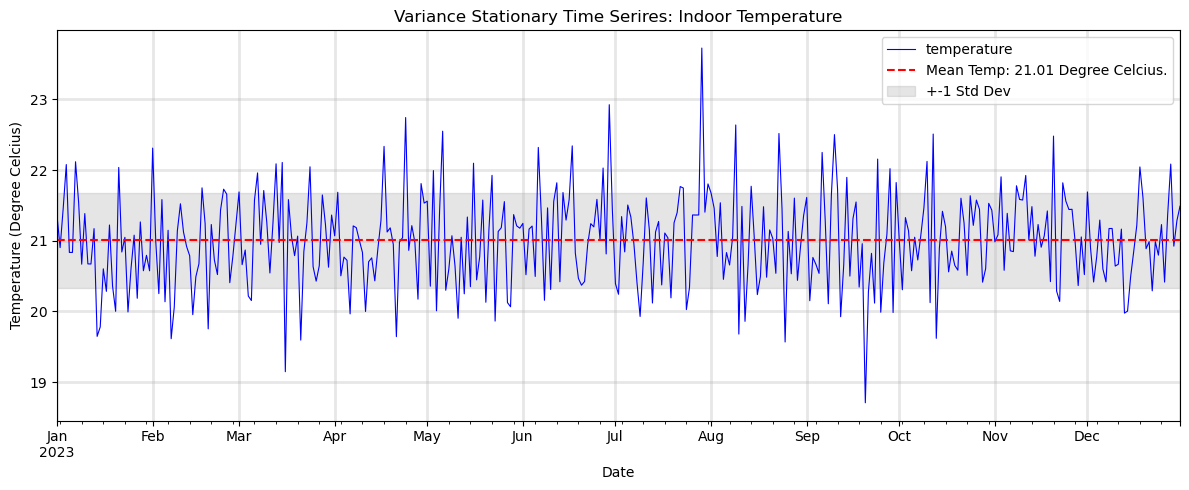

In [ ]:
plt.figure(figsize=(12, 5))
var_stat_data.temperature.plot(color='blue', linewidth=0.8)
plt.axhline(mean_temp, color='red', linestyle='--',
            label=f'Mean Temp: {mean_temp:.2f} Degree Celcius.')

# for shaded area
std_dev = np.sqrt(var_temp)

# plt.fill_between()
plt.fill_between(var_stat_data.index,
                 mean_temp - std_dev,
                 mean_temp + std_dev,
                 alpha=0.2, color='gray', label='+-1 Std Dev')

plt.title('Variance Stationary Time Serires: Indoor Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (Degree Celcius)')
plt.legend()
plt.grid(True, linewidth=2, alpha=0.3)
plt.tight_layout()

plt.savefig('output/Variance_Stationary_Time_Serires_Indoor_Temperature.png')
plt.show()



## Stationary vs. Non-statioanry Data

In [34]:
data = pd.read_csv('data/stationary_vs_nonstationary_data.csv', parse_dates=['date'], index_col='date')
print(data.info())

<class 'pandas.DataFrame'>
DatetimeIndex: 500 entries, 2023-01-01 to 2024-05-14
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   stationary      500 non-null    float64
 1   non_stationary  500 non-null    float64
dtypes: float64(2)
memory usage: 11.7 KB
None


In [46]:
rolling_mean = data.non_stationary.rolling(30).mean()

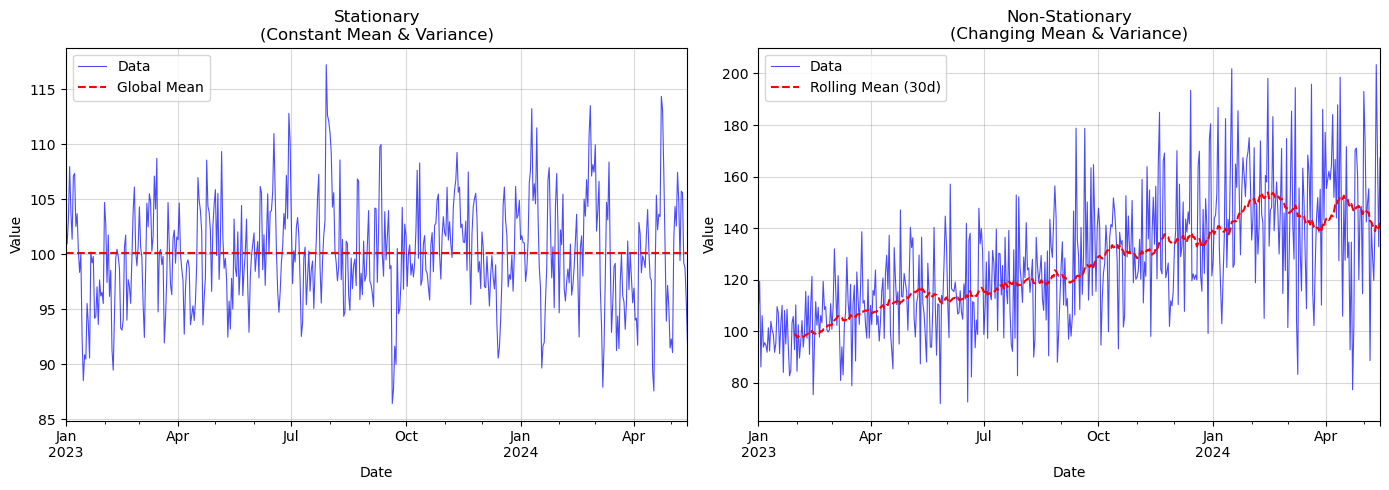

In [58]:
plt.figure(figsize=(14, 5))

# Subplot 1: Stationary
plt.subplot(1, 2, 1)
data.stationary.plot(color='blue', alpha=0.7, linewidth=0.8, label='Data')
plt.axhline(data.stationary.mean(), color='red', linestyle='--', label='Global Mean')
plt.title('Stationary\n(Constant Mean & Variance)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True, color='gray', alpha=0.3)
plt.legend()

# Subplot 2: Non-Stationary
plt.subplot(1, 2, 2)
data.non_stationary.plot(color='blue', alpha=0.7, linewidth=0.8, label='Data')
rolling_mean.plot(color='red', linestyle='--', label='Rolling Mean (30d)')
plt.title('Non-Stationary\n(Changing Mean & Variance)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True, color='gray', alpha=0.3)
plt.legend()

plt.tight_layout()

plt.savefig('output/stationary_vs__non-stationary_mean_and_var.png')
plt.show()